# PCA
_by Anis Hazirah binti Mohamad Sabry 1211300373_

Possible enhancements are:
- To clarify certain concepts already presented.
- To explore more advanced concept of the lab materials.
- To provide visualizations to aid deeper understanding of the lab materials.
- To apply the materials to real-world datasets to further demonstrate how those materials can be used.
- To compare different between the various methods, approaches, or models.
- To demonstrate the advantages and disadvantages of various methods, approaches, or models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data

In [2]:
raw = pd.read_csv('penguins.csv')
display(raw.shape)
display(raw.dtypes)
display(raw.head())

(344, 5)

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
for col in raw.columns:
    print(col, raw[col].isna().sum())

culmen_length_mm 2
culmen_depth_mm 2
flipper_length_mm 2
body_mass_g 2
sex 9


# Clean data with imputing
Since there's some null values we'll impute those to fill in the missing values

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
df = raw.copy()

num = raw.select_dtypes(include=[np.number]).columns
cat = raw.select_dtypes(exclude=[np.number]).columns

numeric_imputer = SimpleImputer(strategy='mean')
df[num] = numeric_imputer.fit_transform(df[num])

categorical_imputer = SimpleImputer(strategy='constant', fill_value='UNKNOWN')
df[cat] = categorical_imputer.fit_transform(df[cat])

for col in df.columns:
    print(col, df[col].isna().sum())

culmen_length_mm 0
culmen_depth_mm 0
flipper_length_mm 0
body_mass_g 0
sex 0


# Pre-processing

## Checking class distribution

In [6]:
target ='sex' # class target variable

sex
MALE       169
FEMALE     165
UNKNOWN      9
.            1
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

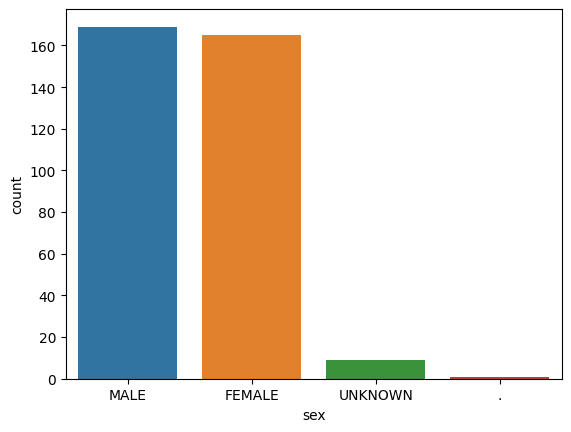

In [7]:
# Class distribution checking
display(df[target].value_counts())
sns.countplot(df, x = target)

sex
MALE      169
FEMALE    165
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

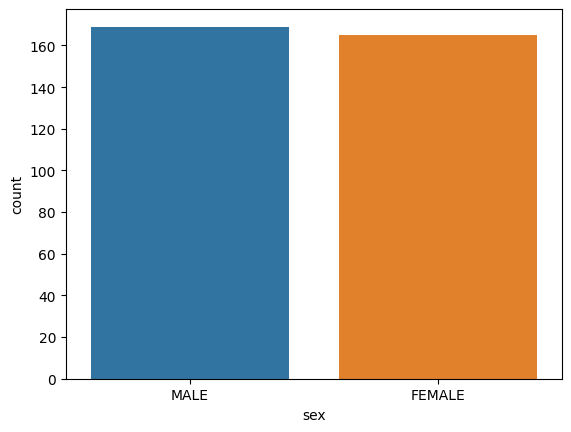

In [8]:
df = df[~df[target].isin(['UNKNOWN', '.'])] # not includng those two values

display(df[target].value_counts())
sns.countplot(df, x = target)

## MinMax
For PCA to work at its full capacity, the data needs to be normalised first

In [9]:
from sklearn.preprocessing import MinMaxScaler # using min max where min value will be 0 and max is 1

In [10]:
X = df.drop(columns=target)
y = df[target]

display(X.shape)
display(y.shape)

(334, 4)

(334,)

In [11]:
minmax = MinMaxScaler()

features = X.columns

X_scaled = minmax.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = features)
X_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.060990,0.291667
1,0.269091,0.511905,0.061964,0.305556
2,0.298182,0.583333,0.063718,0.152778
3,0.167273,0.738095,0.063328,0.208333
4,0.261818,0.892857,0.062744,0.263889


# PCA implementation

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_components, columns= ["principal component 1", "principal component 2"])

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

pca_df.head()

[0.61572385 0.25765324]
[5.4927301  3.55314618]


,principal component 1,principal component 2
0,-0.273716,-0.002041
1,-0.165534,-0.107074
2,-0.295144,-0.077878
3,-0.411290,-0.022228
4,-0.423598,0.166281


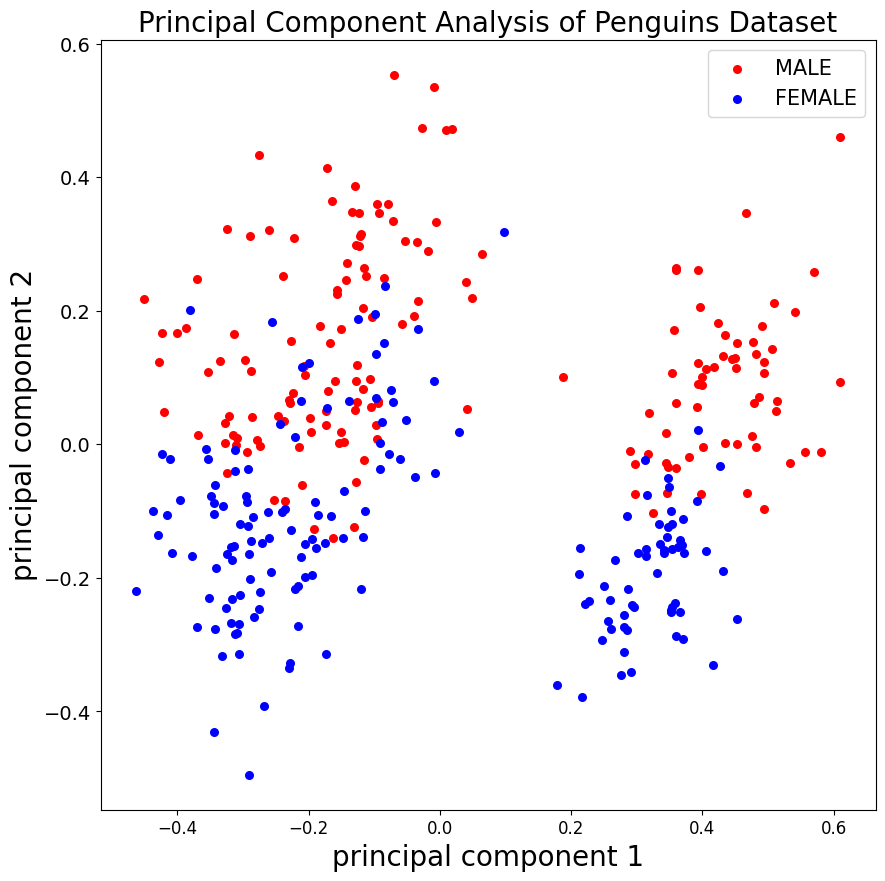

In [14]:
plt.figure(figsize=(10,10))

pca_df = pca_df.set_index(df.index)

targets = df['sex'].unique()
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = df['sex'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'principal component 1'],
                pca_df.loc[indices_to_keep, 'principal component 2'],
                c=color, s=30)

plt.legend(targets, prop={'size': 15})

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("principal component 1", fontsize=20)
plt.ylabel("principal component 2", fontsize=20)
plt.title("Principal Component Analysis of Penguins Dataset", fontsize=20)

plt.show()

# PCA 3D Scatterplot

In [15]:
from mpl_toolkits.mplot3d import Axes3D # to make 3d matplotlib plots

In [16]:
pca = PCA(n_components=3)

pca_components = pca.fit_transform(X_scaled)

pca3_df = pd.DataFrame(pca_components, columns= ["principal component 1", "principal component 2", "principal component 3"])

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

pca3_df.head()

[0.61572385 0.25765324 0.10885942]
[5.4927301  3.55314618 2.30955486]


,principal component 1,principal component 2,principal component 3
0,-0.273716,-0.002041,-0.075898
1,-0.165534,-0.107074,-0.035839
2,-0.295144,-0.077878,0.071961
3,-0.411290,-0.022228,-0.094022
4,-0.423598,0.166281,-0.110359


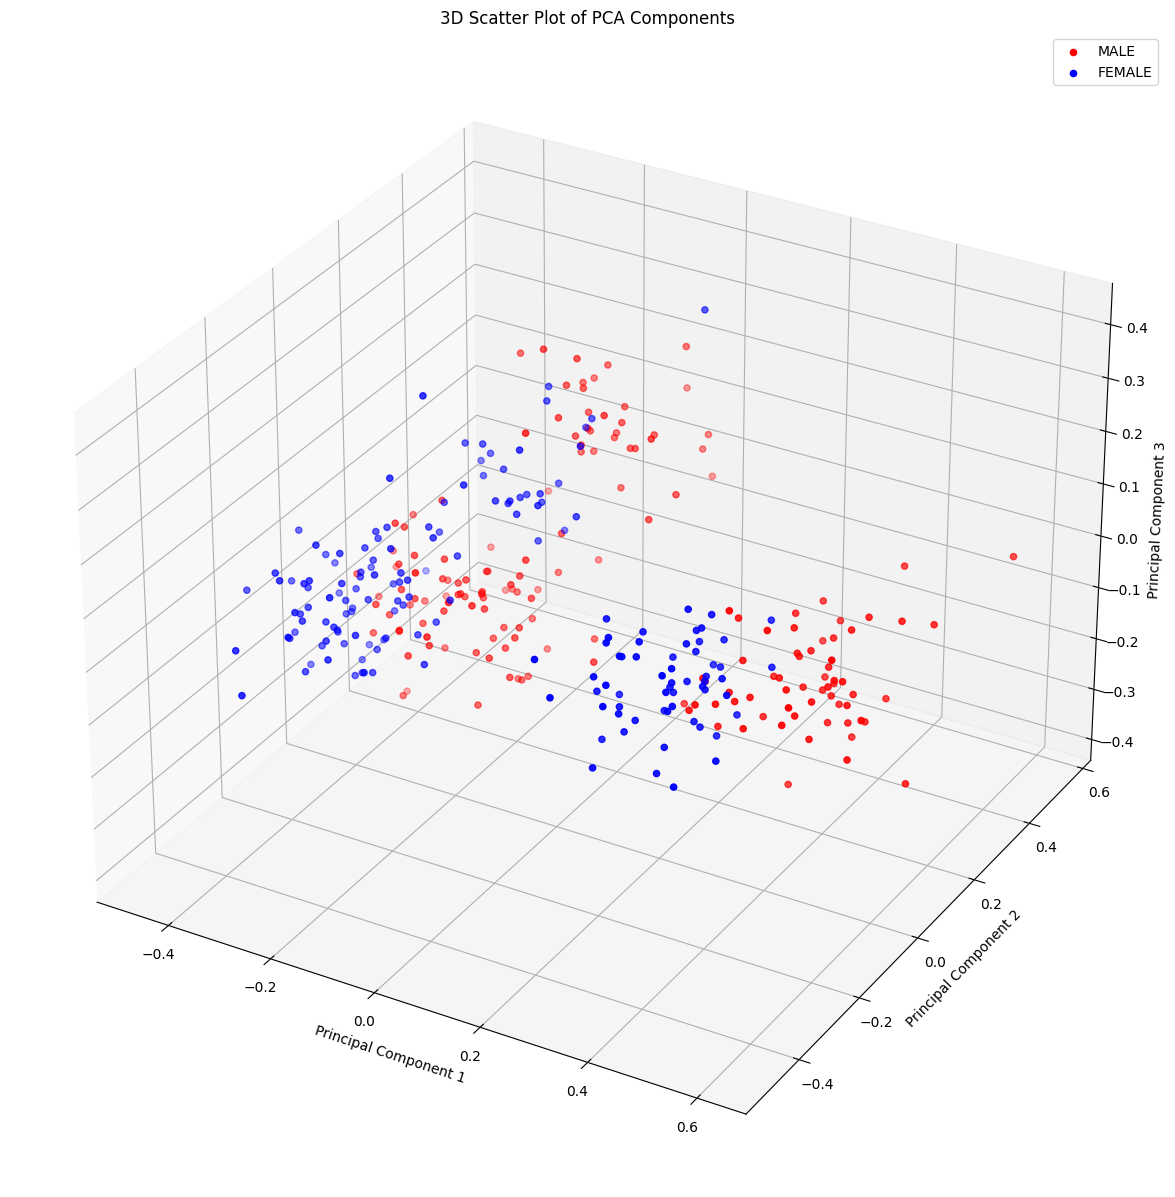

In [17]:
targets = df['sex'].unique()
colors = ['r', 'b']

pca3_df = pca3_df.set_index(df.index)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for target, color in zip(targets, colors):
    indices_to_keep = df['sex'] == target
    ax.scatter(pca3_df.loc[indices_to_keep, 'principal component 1'],
                pca3_df.loc[indices_to_keep, 'principal component 2'],
                pca3_df.loc[indices_to_keep, 'principal component 3'],
                c=color, label=target)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Scatter Plot of PCA Components")

ax.legend()

plt.show()

# Using real world data

# Load data
Collected from https://v1.dosm.gov.my/v1/index.php?r=column3/accordion&menu_id=amZNeW9vTXRydTFwTXAxSmdDL1J4dz09

In [18]:
raw = pd.read_excel('Number_of_registered_doctors_dentists_nurses_and_community_nurses_by_state_2015-2017.xlsx')
display(raw.head())

,State,Year,Staff type,Hospital category,Number of staff
0,Johor,2015,Doctor,Government,2854
1,Johor,2015,Doctor,Private,1399
2,Johor,2015,Dentist,Government,331
3,Johor,2015,Dentist,Private,259
4,Johor,2015,Nurse,Government,6441


# Cleaning the Data

In [19]:
display(raw.shape)
display(raw.dtypes)

(384, 5)

State                object
Year                  int64
Staff type           object
Hospital category    object
Number of staff      object
dtype: object

In [20]:
for col in raw.columns:
    print(col, raw[col].isna().sum())

State 0
Year 0
Staff type 0
Hospital category 0
Number of staff 0


In [21]:
for col in raw.columns:
    print(col, raw[col].unique())
    print()

State ['Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Pulau Pinang' 'Perak' 'Perlis' 'Selangor' 'Terengganu' 'Sabah' 'Sarawak'
 'W.P. Kuala Lumpur' 'W.P. Labuan' 'W.P. Putrajaya']

Year [2015 2016 2017]

Staff type ['Doctor' 'Dentist' 'Nurse' 'Community Nurse']

Hospital category ['Government ' 'Private' 'Government']

Number of staff [2854 1399 331 259 6441 2577 2095 29 2887 1496 384 289 6688 3236 2028 85
 3235 1580 546 317 6785 3502 1966 35 2036 566 263 75 4542 1110 1699 12
 2166 593 292 78 4613 1042 1691 11 2292 630 365 87 4684 1113 1668 10 1658
 279 346 53 4818 469 1683 6 1732 290 403 52 4861 424 1687 136 1945 307 473
 56 4906 453 1677 26 1112 499 65 2072 1439 736 5 1175 532 173 73 2252 1528
 742 7 1383 562 265 2256 1619 721 1502 475 223 60 2479 1278 928 489 209
 2585 1080 916 1946 524 285 82 2653 1262 930 1630 333 351 59 3857 747 1817
 354 419 4015 844 1800 1818 382 448 64 4075 1024 1715 9 1831 1118 239 179
 3393 3924 49 1939 1167 276 200 3542 3911 1012 55 2581 1

## Dtypes fix

In [22]:
df_dtype = raw.copy()

fix = 'Number of staff'

In [23]:
nulls = df_dtype.loc[df_dtype[fix] == '-', fix].sum()
len(nulls)

10

In [24]:
df_dtype[fix].unique()

array([2854, 1399, 331, 259, 6441, 2577, 2095, 29, 2887, 1496, 384, 289,
       6688, 3236, 2028, 85, 3235, 1580, 546, 317, 6785, 3502, 1966, 35,
       2036, 566, 263, 75, 4542, 1110, 1699, 12, 2166, 593, 292, 78, 4613,
       1042, 1691, 11, 2292, 630, 365, 87, 4684, 1113, 1668, 10, 1658,
       279, 346, 53, 4818, 469, 1683, 6, 1732, 290, 403, 52, 4861, 424,
       1687, 136, 1945, 307, 473, 56, 4906, 453, 1677, 26, 1112, 499, 65,
       2072, 1439, 736, 5, 1175, 532, 173, 73, 2252, 1528, 742, 7, 1383,
       562, 265, 2256, 1619, 721, 1502, 475, 223, 60, 2479, 1278, 928,
       489, 209, 2585, 1080, 916, 1946, 524, 285, 82, 2653, 1262, 930,
       1630, 333, 351, 59, 3857, 747, 1817, 354, 419, 4015, 844, 1800,
       1818, 382, 448, 64, 4075, 1024, 1715, 9, 1831, 1118, 239, 179,
       3393, 3924, 49, 1939, 1167, 276, 200, 3542, 3911, 1012, 55, 2581,
       1210, 357, 218, 3598, 4037, 980, 47, 2378, 1009, 278, 134, 5764,
       1836, 2149, 2, 2544, 1060, 318, 152, 5872, 1799, 2133,

In [25]:
median_value = df_dtype[fix].replace('-', np.nan).median()
median_value = round(median_value)

df_dtype[fix] = df_dtype[fix].replace('-', median_value)

# make 'Year' categorical
df_dtype['Year'] = df_dtype['Year'].astype('object')

display(df_dtype.shape)
display(df_dtype.dtypes)
display(df_dtype.head())

(384, 5)

State                object
Year                 object
Staff type           object
Hospital category    object
Number of staff       int64
dtype: object

,State,Year,Staff type,Hospital category,Number of staff
0,Johor,2015,Doctor,Government,2854
1,Johor,2015,Doctor,Private,1399
2,Johor,2015,Dentist,Government,331
3,Johor,2015,Dentist,Private,259
4,Johor,2015,Nurse,Government,6441


In [26]:
display(df_dtype[fix].isna().sum())
df_dtype[fix].unique()

0

array([2854, 1399,  331,  259, 6441, 2577, 2095,   29, 2887, 1496,  384,
        289, 6688, 3236, 2028,   85, 3235, 1580,  546,  317, 6785, 3502,
       1966,   35, 2036,  566,  263,   75, 4542, 1110, 1699,   12, 2166,
        593,  292,   78, 4613, 1042, 1691,   11, 2292,  630,  365,   87,
       4684, 1113, 1668,   10, 1658,  279,  346,   53, 4818,  469, 1683,
          6, 1732,  290,  403,   52, 4861,  424, 1687,  136, 1945,  307,
        473,   56, 4906,  453, 1677,   26, 1112,  499,   65, 2072, 1439,
        736,    5, 1175,  532,  173,   73, 2252, 1528,  742,    7, 1383,
        562,  265, 2256, 1619,  721, 1502,  475,  223,   60, 2479, 1278,
        928,  489,  209, 2585, 1080,  916, 1946,  524,  285,   82, 2653,
       1262,  930, 1630,  333,  351,   59, 3857,  747, 1817,  354,  419,
       4015,  844, 1800, 1818,  382,  448,   64, 4075, 1024, 1715,    9,
       1831, 1118,  239,  179, 3393, 3924,   49, 1939, 1167,  276,  200,
       3542, 3911, 1012,   55, 2581, 1210,  357,  2

# Exploratory Data Analysis
Quick glance at the data

In [27]:
df = df_dtype.copy()

display(df.dtypes)
display(df.columns)

State                object
Year                 object
Staff type           object
Hospital category    object
Number of staff       int64
dtype: object

Index(['State', 'Year', 'Staff type', 'Hospital category', 'Number of staff'], dtype='object')

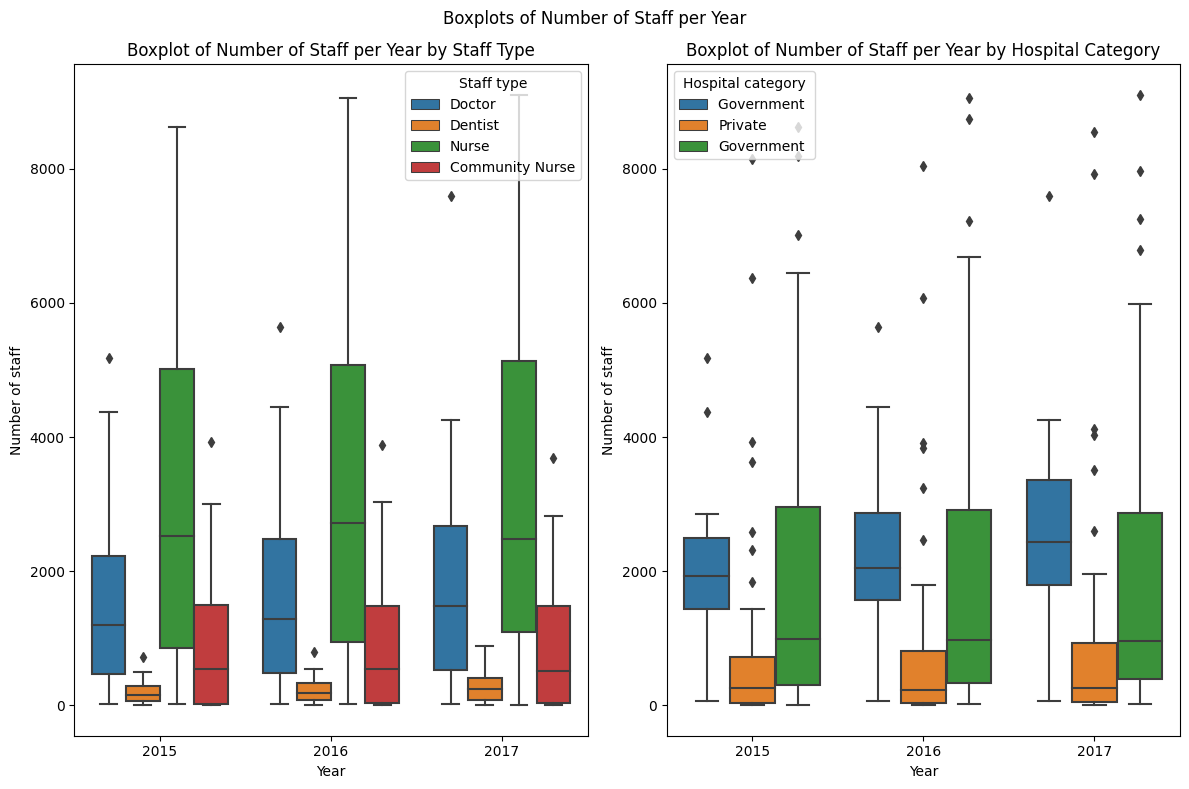

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

sns.boxplot(df, x = 'Year', y = 'Number of staff', hue='Staff type', ax=ax[0])
ax[0].set_title('Boxplot of Number of Staff per Year by Staff Type')

sns.boxplot(df, x = 'Year', y = 'Number of staff', hue='Hospital category', ax=ax[1])
ax[1].set_title('Boxplot of Number of Staff per Year by Hospital Category')

plt.suptitle('Boxplots of Number of Staff per Year')

plt.tight_layout()
plt.show()

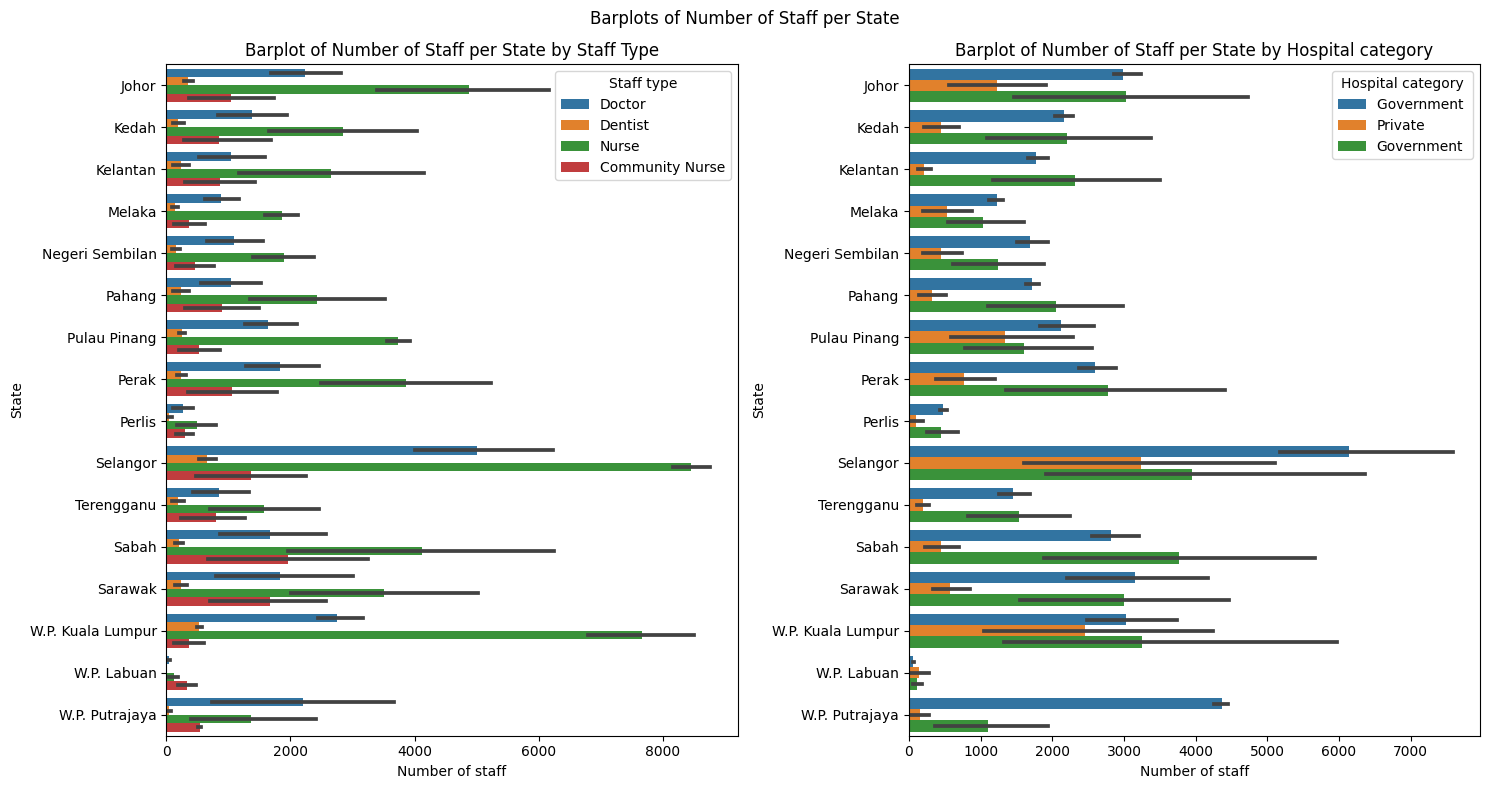

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

sns.barplot(df, x = 'Number of staff', y = 'State', hue= 'Staff type', ax=ax[0])
ax[0].set_title('Barplot of Number of Staff per State by Staff Type')

sns.barplot(df, x = 'Number of staff', y = 'State', hue= 'Hospital category', ax=ax[1])
ax[1].set_title('Barplot of Number of Staff per State by Hospital category')

plt.suptitle('Barplots of Number of Staff per State')

plt.tight_layout()
plt.show()

# Pre-processing

## Checking class distribution

In [30]:
target ='Hospital category' # class target variable

Hospital category
Private        192
Government     144
Government      48
Name: count, dtype: int64

<Axes: xlabel='Hospital category', ylabel='count'>

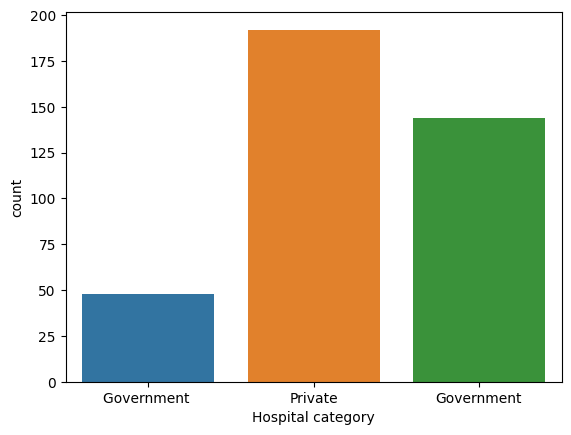

In [31]:
# Class distribution checking
display(df[target].value_counts())
sns.countplot(df, x = target)

## SMOTENC (Balancing class distribution)
SMOTENC is an extension of SMOTE that handles both categorical and numerical data

In [32]:
from imblearn.over_sampling import SMOTENC

In [33]:
df.dtypes

State                object
Year                 object
Staff type           object
Hospital category    object
Number of staff       int64
dtype: object

In [34]:
target = 'Hospital category'

X = df.drop(columns=target)
y = df[target]

display(X.shape)
display(y.shape)

(384, 4)

(384,)

In [35]:
cat = X.select_dtypes(include='object').columns.values.tolist()
cat

['State', 'Year', 'Staff type']

In [36]:
smote_nc = SMOTENC(categorical_features= cat, random_state=5)

X_res, y_res = smote_nc.fit_resample(X, y)

display(X_res.shape)
display(y_res.shape)

(576, 4)

(576,)

In [37]:
df_res = pd.concat([X_res, y_res], axis=1)
df_res

,State,Year,Staff type,Number of staff,Hospital category
0,Johor,2015,Doctor,2854,Government
1,Johor,2015,Doctor,1399,Private
2,Johor,2015,Dentist,331,Government
3,Johor,2015,Dentist,259,Private
4,Johor,2015,Nurse,6441,Government
...,...,...,...,...,...
571,Negeri Sembilan,2017,Doctor,1945,Government
572,Kelantan,2016,Doctor,1695,Government
573,Perak,2016,Doctor,2439,Government
574,Kedah,2016,Doctor,2266,Government


Hospital category
Government     192
Private        192
Government     192
Name: count, dtype: int64

<Axes: xlabel='Hospital category', ylabel='count'>

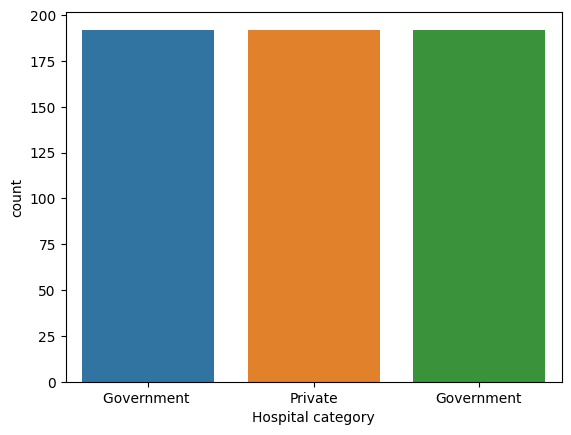

In [38]:
# Class distribution checking
display(df_res[target].value_counts())
sns.countplot(df_res, x = target)

## MinMax
For PCA to work at its full capacity, the data needs to be normalised first

In [39]:
df_res.dtypes

State                object
Year                 object
Staff type           object
Number of staff       int64
Hospital category    object
dtype: object

In [40]:
features = X.select_dtypes(include='number').columns.values.tolist()
features

['Number of staff']

In [41]:
minmax = MinMaxScaler()

X_scaled = minmax.fit_transform(X_res[features])
X_scaled = pd.DataFrame(X_scaled, columns = features)
X_scaled.head()

,Number of staff
0,0.313482
1,0.153609
2,0.036260
3,0.028349
4,0.707615


In [42]:
X_res[features] = X_scaled[features]
X_res

,State,Year,Staff type,Number of staff
0,Johor,2015,Doctor,0.313482
1,Johor,2015,Doctor,0.153609
2,Johor,2015,Dentist,0.036260
3,Johor,2015,Dentist,0.028349
4,Johor,2015,Nurse,0.707615
...,...,...,...,...
571,Negeri Sembilan,2017,Doctor,0.213603
572,Kelantan,2016,Doctor,0.186133
573,Perak,2016,Doctor,0.267883
574,Kedah,2016,Doctor,0.248874


## Label encoder
Since the other values are categorical, we need to encode them

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
features = X_res.select_dtypes(include='object').columns.values.tolist()
features

['State', 'Year', 'Staff type']

In [45]:
le = LabelEncoder()

for col in features:
    X_res[col] = le.fit_transform(X_res[col])

X_res

,State,Year,Staff type,Number of staff
0,0,0,2,0.313482
1,0,0,2,0.153609
2,0,0,1,0.036260
3,0,0,1,0.028349
4,0,0,3,0.707615
...,...,...,...,...
571,4,2,2,0.213603
572,2,1,2,0.186133
573,6,1,2,0.267883
574,1,1,2,0.248874


In [46]:
df_encoded = df_res.copy()
df_encoded[X_res.columns] = X_res

df_encoded

,State,Year,Staff type,Number of staff,Hospital category
0,0,0,2,0.313482,Government
1,0,0,2,0.153609,Private
2,0,0,1,0.036260,Government
3,0,0,1,0.028349,Private
4,0,0,3,0.707615,Government
...,...,...,...,...,...
571,4,2,2,0.213603,Government
572,2,1,2,0.186133,Government
573,6,1,2,0.267883,Government
574,1,1,2,0.248874,Government


# PCA implementation

In [47]:
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X_res)

pca_df = pd.DataFrame(pca_components, columns= ["principal component 1", "principal component 2"])

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

pca_df.head()

[0.93062254 0.04157477]
[115.94893165  24.50726654]


,principal component 1,principal component 2
0,-7.476245,-0.451210
1,-7.476928,-0.434421
2,-7.478271,0.571561
3,-7.478304,0.572392
4,-7.473719,-1.486259


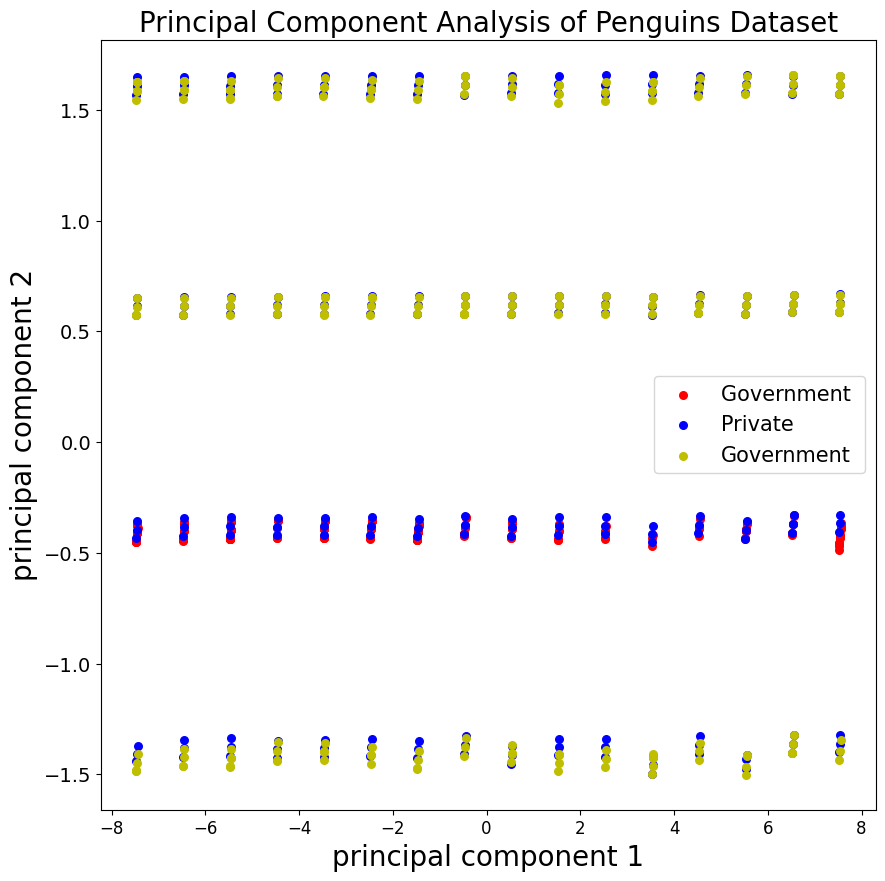

In [48]:
plt.figure(figsize=(10,10))

pca_df = pca_df.set_index(df_res.index)

targets = df_res['Hospital category'].unique()
colors = ['r', 'b', 'y']

for target, color in zip(targets, colors):
    indices_to_keep = df_res['Hospital category'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'principal component 1'],
                pca_df.loc[indices_to_keep, 'principal component 2'],
                c=color, s=30)

plt.legend(targets, prop={'size': 15})

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("principal component 1", fontsize=20)
plt.ylabel("principal component 2", fontsize=20)
plt.title("Principal Component Analysis of Penguins Dataset", fontsize=20)

plt.show()

# PCA 3D Scatterplot

In [49]:
pca = PCA(n_components=3)

pca_components = pca.fit_transform(X_res)

pca3_df = pd.DataFrame(pca_components, columns= ["principal component 1", "principal component 2", "principal component 3"])

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

pca3_df.head()

[0.93062254 0.04157477 0.02646675]
[115.94893165  24.50726654  19.55376095]


,principal component 1,principal component 2,principal component 3
0,-7.476245,-0.451210,0.877148
1,-7.476928,-0.434421,0.882996
2,-7.478271,0.571561,0.923781
3,-7.478304,0.572392,0.924071
4,-7.473719,-1.486259,0.826239


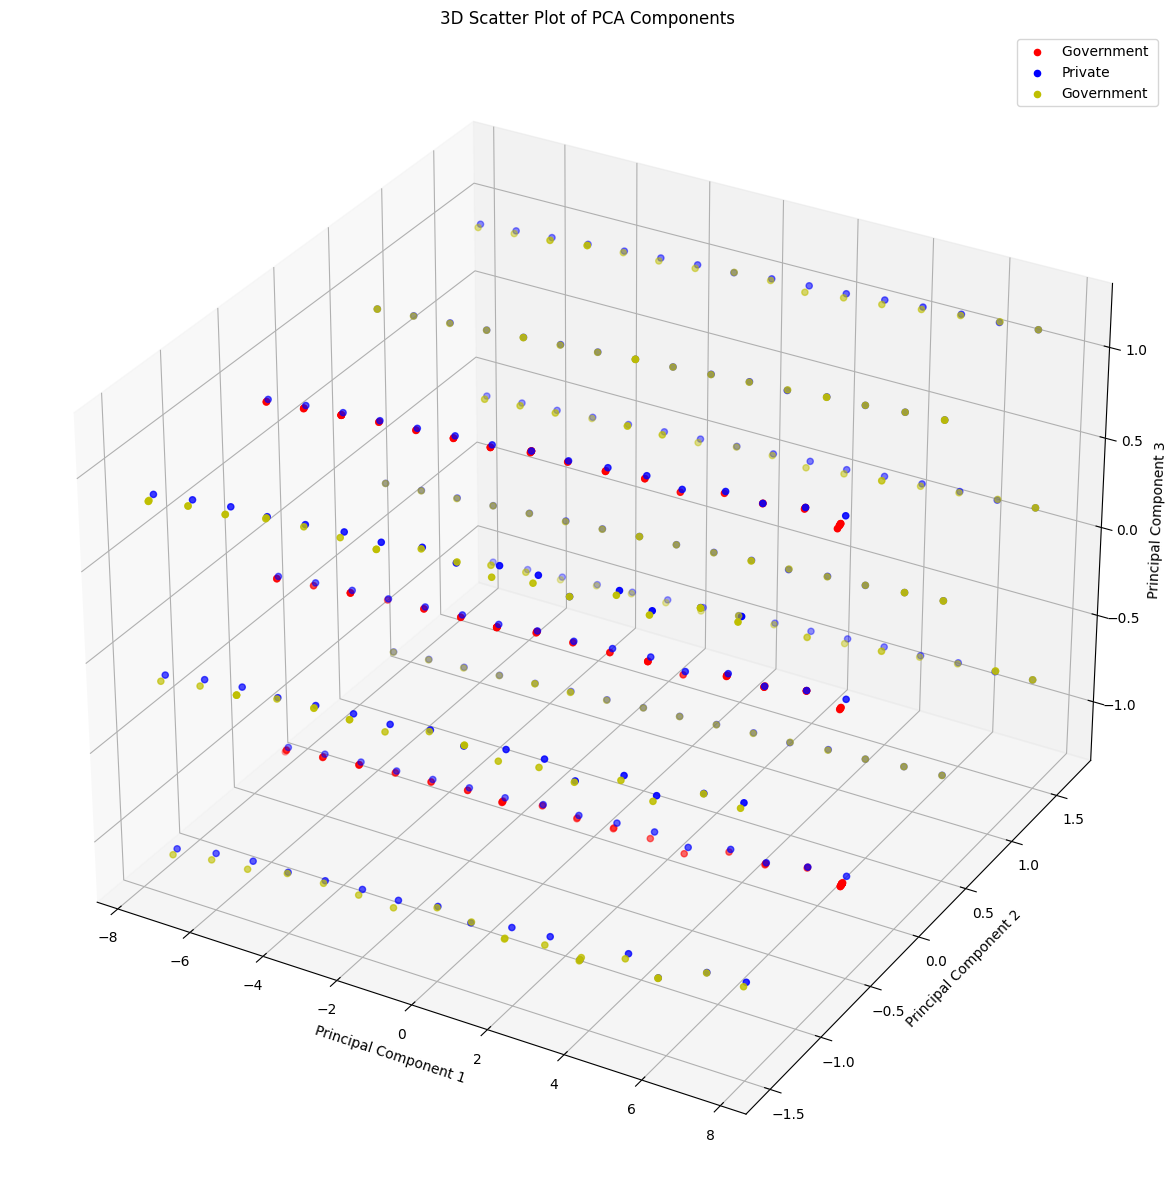

In [50]:
targets = df_res['Hospital category'].unique()
colors = ['r', 'b', 'y']

pca3_df = pca3_df.set_index(df_res.index)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for target, color in zip(targets, colors):
    indices_to_keep = df_res['Hospital category'] == target
    ax.scatter(pca3_df.loc[indices_to_keep, 'principal component 1'],
                pca3_df.loc[indices_to_keep, 'principal component 2'],
                pca3_df.loc[indices_to_keep, 'principal component 3'],
                c=color, label=target)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Scatter Plot of PCA Components")

ax.legend()

plt.show()

# Thoughts
PCA is not compatible with categorical datatypes. This is because PCA relies on the variance structure of the variables,
that assuming a linear relationship between values, quantifying the dispersion of data points around a central tendency and calculating the how much a data point deviates from the mean.
This factor is not present for categorical values.